In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scienceplots
plt.style.use("science")
# plt.rcParams['text.latex.preamble'] = r'''
#     \usepackage[T1]{fontenc}
#     \usepackage{XCharter}
#     \usepackage[charter,vvarbb,scaled=1.05]{newtxmath}
# '''

plt.rcParams['text.latex.preamble'] = r'''
        \usepackage[T1]{fontenc}
        \usepackage{newtxtext,newtxmath}
    '''

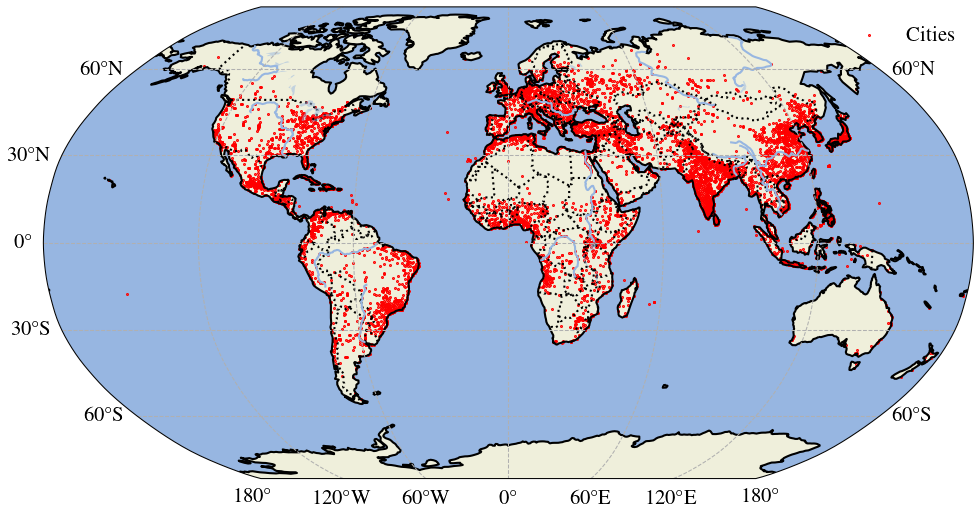

In [2]:
# Load the CSV data into a DataFrame
csv_file_path = '../../data/worldcities/worldcities.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file_path)


# Filter the top 10,000 largest cities by population
top_cities = df.nlargest(10000, 'population')

# Create a map using the Robinson projection
fig = plt.figure(figsize=(8, 6), dpi=150)
ax = plt.axes(projection=ccrs.Robinson())

# Add a simple basemap
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot the cities
ax.scatter(top_cities['lng'], top_cities['lat'], color='red', s=0.2, transform=ccrs.PlateCarree(), label='Cities')
ax.set_global()
ax.legend()
# Show the map
plt.savefig("10k_worldcities.png", dpi=300)
plt.show()